# **Feature Engineering.**
El preprocesamiento de datos es una etapa fundamental en la construcción de cualquier modelo de predicción. En este notebook, aplicaremos técnicas para **transformar y preparar el dataset** antes de su uso en el modelado.

Dado que en el análisis exploratorio del notebook anterior, identificamos la presencia de **variables categóricas,, creación de nuevas características y selección de características reelvantes para el modelo**.

Al finalizar este proceso, guardaremos un **dataset limpio en `data/processed/`**, que servirá como insumo en la siguiente fase de modelado.

## **Importación de librerías.**

In [886]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

## **Importación e información de Dataframes.**

In [887]:
df = pd.read_csv('../data/cleaned/IA_PROPENSITY_CLEANED_v2.csv', index_col=0)
df.head()

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,Campanna1,Campanna2,Campanna3,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,,,
CLI1,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,M,Empresa,Asturias,SI,NO,NO,Medio-Bajo,NO DATA,Averia muy grave,SI,2892,0,False,2,18,0
CLI2,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,F,Empresa,Toledo,NO,NO,NO,Medio-Bajo,SI,No,NO,1376,7187,False,2,53,0
CLI3,A,TIPO1,FUEL 1,Baja,M,Otros,CASADO,M,Empresa,Lerida,NO,NO,NO,Medio,NO DATA,No,NO,1376,0,True,4,21,3
CLI4,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Empresa,Madrid,SI,NO,NO,Medio,SI,Averia muy grave,SI,2015,7256,True,4,48,5
CLI5,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Funcionario,Santa Cruz de Tenerife,SI,NO,SI,Alto,NO DATA,No,NO,1818,0,True,3,21,3


In [888]:
df.shape

(56074, 23)

In [889]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56074 entries, CLI1 to CLI58048
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   PRODUCTO         56074 non-null  object
 1   TIPO_CARROCERIA  56074 non-null  object
 2   COMBUSTIBLE      56074 non-null  object
 3   Potencia         56074 non-null  object
 4   TRANS            56074 non-null  object
 5   FORMA_PAGO       56074 non-null  object
 6   ESTADO_CIVIL     56074 non-null  object
 7   GENERO           56074 non-null  object
 8   OcupaciOn        56074 non-null  object
 9   PROVINCIA        56074 non-null  object
 10  Campanna1        56074 non-null  object
 11  Campanna2        56074 non-null  object
 12  Campanna3        56074 non-null  object
 13  Zona_Renta       56074 non-null  object
 14  REV_Garantia     56074 non-null  object
 15  Averia_grave     56074 non-null  object
 16  QUEJA_CAC        56074 non-null  object
 17  COSTE_VENTA      56074 non-nul

In [890]:
df.columns

Index(['PRODUCTO', 'TIPO_CARROCERIA', 'COMBUSTIBLE', 'Potencia', 'TRANS', 'FORMA_PAGO', 'ESTADO_CIVIL', 'GENERO', 'OcupaciOn', 'PROVINCIA', 'Campanna1', 'Campanna2', 'Campanna3', 'Zona_Renta', 'REV_Garantia', 'Averia_grave', 'QUEJA_CAC', 'COSTE_VENTA', 'km_anno', 'Mas_1_coche', 'Revisiones', 'Edad_Cliente', 'Tiempo'], dtype='object')

A continuación se describen las variables incluidas en el dataset, utilizadas para el análisis de propensión de compra de vehículos.
- **Code.** Código único que identifica a cada cliente.
- **Producto.** Modelo o tipo de coche adquirido por el cliente.
- **Tipo de Carroceria.** Tipo de carrocería del vehículo (SUV, sedán, coupé, etc.).
- **Combustible.** Tipo de combustible utilizado por el vehículo (diésel, gasolina, eléctrico, híbrido).
- **Potencia.** Potencia del motor del coche (puede estar en CV o kW).
- **Trans.** Tipo de transmisión del coche (manual, automática).
- **Forma de Pago.** Método de pago del cliente (financiado o contado).
- **Estado Civil.** Estado civil del cliente (soltero, casado, divorciado, etc.).
- **Género.** Género del cliente (masculino, femenino).
- **Ocupación.** Profesión o sector de trabajo del cliente.
- **Provincia.** Ubicación geográfica del cliente.
- **Campanna1.** Historial de participación del cliente en la primera campaña de marketing.
- **Campanna2.** Historial de participación del cliente en la segunda campaña de marketing.
- **Campanna3.** Historial de participación del cliente en la tercera campaña de marketing.
- **Zona Renta.** Clasificación de la zona de residencia del cliente según nivel de renta.
- **REV Garantia.** Indica si el vehículo ha recibido revisiones dentro del período de garantía.
- **Averia Grave.** Indica si el coche ha tenido alguna avería grave registrada.
- **Queja CAC.** Indica si el cliente ha presentado quejas al servicio de atención al cliente.
- **Coste Venta.** Precio final del coche después de aplicar descuentos.
- **KM Año.** Promedio de kilómetros recorridos por año por el cliente.
- **Más de 1 Coche.** Variable objetivo (1 si el cliente ha comprado más de un coche, 0 si no).
- **Revisiones.** Número de revisiones del coche en concesionarios oficiales.
- **Edad Cliente.** Edad actual del cliente en años.
- **Tiempo.** Tiempo en años transcurridos entre la primera y la última compra del cliente.

In [891]:
df.head(3)

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,Campanna1,Campanna2,Campanna3,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,,,
CLI1,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,M,Empresa,Asturias,SI,NO,NO,Medio-Bajo,NO DATA,Averia muy grave,SI,2892,0,False,2,18,0
CLI2,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,F,Empresa,Toledo,NO,NO,NO,Medio-Bajo,SI,No,NO,1376,7187,False,2,53,0
CLI3,A,TIPO1,FUEL 1,Baja,M,Otros,CASADO,M,Empresa,Lerida,NO,NO,NO,Medio,NO DATA,No,NO,1376,0,True,4,21,3


## **Selección de variables categóricas y continuas.**
Para realizar correctamente un ánalisis de datos debemos de distinguir entre las variables categóricas, variables que representan diferentes categorías o grupos, y continuas, variables que pueden tomar cualquier valor dentro de un rango determinado.

In [892]:
v_continuas = []
v_categoricas = []
for i in df.columns:
    if df[i].nunique() > 55 or df[i].dtypes in ['float64', 'int64']:
        v_continuas.append(i)
    else:
        v_categoricas.append(i)

print('Variables continuas: {}'.format(', '.join(v_continuas)))
print('Variables categóricas: {}'.format(', '.join(v_categoricas)))

Variables continuas: COSTE_VENTA, km_anno, Revisiones, Edad_Cliente, Tiempo
Variables categóricas: PRODUCTO, TIPO_CARROCERIA, COMBUSTIBLE, Potencia, TRANS, FORMA_PAGO, ESTADO_CIVIL, GENERO, OcupaciOn, PROVINCIA, Campanna1, Campanna2, Campanna3, Zona_Renta, REV_Garantia, Averia_grave, QUEJA_CAC, Mas_1_coche


### **Tratamiento de variables categóricas.**
Para el posterior modelo de clasificación, necesitamos codificar nuestras variables. Para ello, realizaremos una codificación ordinal que consiste en asignar valores enteros a las categorias basándose en su posición o jerarquía en los datos.

In [893]:
df[v_categoricas].head(3)

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,Campanna1,Campanna2,Campanna3,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,Mas_1_coche
CODE,,,,,,,,,,,,,,,,,,
CLI1,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,M,Empresa,Asturias,SI,NO,NO,Medio-Bajo,NO DATA,Averia muy grave,SI,False
CLI2,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,F,Empresa,Toledo,NO,NO,NO,Medio-Bajo,SI,No,NO,False
CLI3,A,TIPO1,FUEL 1,Baja,M,Otros,CASADO,M,Empresa,Lerida,NO,NO,NO,Medio,NO DATA,No,NO,True


In [894]:
df[v_categoricas].nunique()

PRODUCTO           11
TIPO_CARROCERIA     8
COMBUSTIBLE         2
Potencia            3
TRANS               2
FORMA_PAGO          4
ESTADO_CIVIL        4
GENERO              2
OcupaciOn           3
PROVINCIA          53
Campanna1           2
Campanna2           2
Campanna3           2
Zona_Renta          5
REV_Garantia        2
Averia_grave        4
QUEJA_CAC           2
Mas_1_coche         2
dtype: int64

In [895]:
df[v_categoricas].describe()

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,Campanna1,Campanna2,Campanna3,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,Mas_1_coche
count,56074,56074,56074,56074,56074,56074,56074,56074,56074,56074,56074,56074,56074,56074,56074,56074,56074,56074
unique,11,8,2,3,2,4,4,2,3,53,2,2,2,5,2,4,2,2
top,B,TIPO1,FUEL 2,Media,M,Contado,CASADO,M,Empresa,Madrid,NO,NO,NO,Alto,NO DATA,No,NO,False
freq,15603,22675,31689,38652,51133,29113,42663,39315,51383,10417,36343,49333,49338,16527,30982,29111,35178,40189


Antes de proceder con la codificación de las variables categóricas, es fundamental realizar una revisión de los valores únicos presentes en cada una de ellas. Este paso nos permite identificar posibles inconsistencias en los datos, como errores de escritura, diferencias en el formato o valores no esperados, que podrían afectar la calidad del modelo.

Al analizar los valores únicos, podremos detectar y corregir errores, agrupar categorías similares si es necesario y definir la estrategia de codificación más adecuada. Una vez verificada la coherencia de los datos, aplicaremos **OrdinalEncoder** o **LabelEncoder** según corresponda, asegurando que las variables estén en el formato adecuado para su uso en el modelo predictivo.

In [896]:
print('Valores únicos de las variables categóricas:')
for col in v_categoricas:
    print(f"- {col}: {df[col].unique()}")

Valores únicos de las variables categóricas:
- PRODUCTO: ['A' 'B' 'C' 'H' 'J' 'D' 'I' 'E' 'F' 'K' 'G']
- TIPO_CARROCERIA: ['TIPO1' 'TIPO6' 'TIPO4' 'TIPO7' 'TIPO8' 'TIPO2' 'TIPO3' 'TIPO5']
- COMBUSTIBLE: ['FUEL 1' 'FUEL 2']
- Potencia: ['Baja' 'Media' 'Alta']
- TRANS: ['M' 'A']
- FORMA_PAGO: ['Contado' 'Otros' 'Financiera Marca' 'Financiera Banco']
- ESTADO_CIVIL: ['CASADO' 'SOLTERO' 'OTROS' 'EN PAREJA']
- GENERO: ['M' 'F']
- OcupaciOn: ['Empresa' 'Funcionario' 'Autonomo']
- PROVINCIA: ['Asturias' 'Toledo' 'Lerida' 'Madrid' 'Santa Cruz de Tenerife'
 'Pontevedra' 'Lacoruna' 'Barcelona' 'Cordoba' 'Guipuzcua' 'Valladolid'
 'Castellon' 'Valencia' 'Las Palmas' 'La Rioja' 'Baleares' 'Zaragoza'
 'Alicante' 'Tarragona' 'Leon' 'Lugo' 'Badajoz' 'Vizcaya' 'Sevilla'
 'Guadalajara' 'Ciudad Real' 'Cantabria' 'Orense' 'Navarra' 'Gerona'
 'Malaga' 'Jaen' 'Murcia' 'Burgos' 'Granada' 'Alava' 'Cuenca' 'Cadiz'
 'Salamanca' 'Albacete' 'Almeria' 'Teruel' 'Segovia' 'Palencia' 'Huelva'
 'Huesca' 'Zamora' 'Avil

Para convertir las variables categóricas en un formato numérico adecuado, se aplicarán distintas estrategias de codificación según su naturaleza:
- Se utilizará **OrdinalEncoder** en las variables que presentan un **orden lógico** en sus categorías:
    - **Potencia:** Baja < Media < Alta.
    - **Zona_Renta:** Otros < Medio-Bajo < Medio < Alto.
    - **Averia_grave:** No < Averia leve < Averia grave < Averia muy grave.
- Para el resto de las variables categóricas, que no tienen un orden inherente, se aplicará **LabelEncoder**, asegurando que cada categoría sea representada por un valor numérico sin introducir una jerarquía artificial.

#### **Agrupación de valores.**
En modelos de **Machine Learning**, especialmente aquellos orientados a la **predicción de la fidelidad del cliente** (recompra de vehículos), las **variables categóricas** juegan un papel clave en la generación de patrones de comportamiento. Sin embargo, cuando estas variables tienen un número elevado de categorías o algunas de ellas tienen poca representatividad, puede ser necesario **agruparlas** para mejorar la eficiencia del modelo sin perder información relevante. La agrupación de variables categóricas es útil para: **reducción de la dimensionalidad** del modelo (riesgo de sobreajuste); evitar **problemas de baja representación**, variables con muy pocos registros, lo que hace difícil que el modelo aprenda patrones confiables sobre ellas; **mejora de la estabilidad del modelo**, unificar categorías con características similares ; **optimización del rendimiento del modelo**, si dos o más categorías tienen un comportamiento similar respecto a la variable objetivo, fusionarlas simplifica la estructura del modelo sin perder información.

Para determinar si una variable debe agruparse, es importante analizar los siguientes aspectos:
1. **Frecuencia de las Categorías.** Si una categoría tiene **muy pocos registros (<5% del total)**, es posible que el modelo no pueda aprender lo suficiente sobre ella. En estos casos, se puede considerar fusionarla con otra categoría más representativa para evitar sesgos en la predicción.
2. **Relación con la Variable Objetivo.** Si dos categorías tienen un **comportamiento muy similar** respecto a la recompra de vehículos, agruparlas no afectará la precisión del modelo.
Se recomienda calcular la **tasa de recompra por categoría** y evaluar si hay diferencias significativas.
3. **Correlación con la Variable Objetivo.** Si una variable categórica tiene **baja correlación** con la recompra (**Mas de 1 Coche**), puede no ser relevante y podría agruparse o incluso eliminarse.
4. **Impacto en la Interpretabilidad.** Si el objetivo del modelo es mejorar estrategias de marketing, es importante que las categorías sigan teniendo **sentido comercial**. Agrupar categorías de manera arbitraria puede hacer que las recomendaciones del modelo sean menos interpretables.


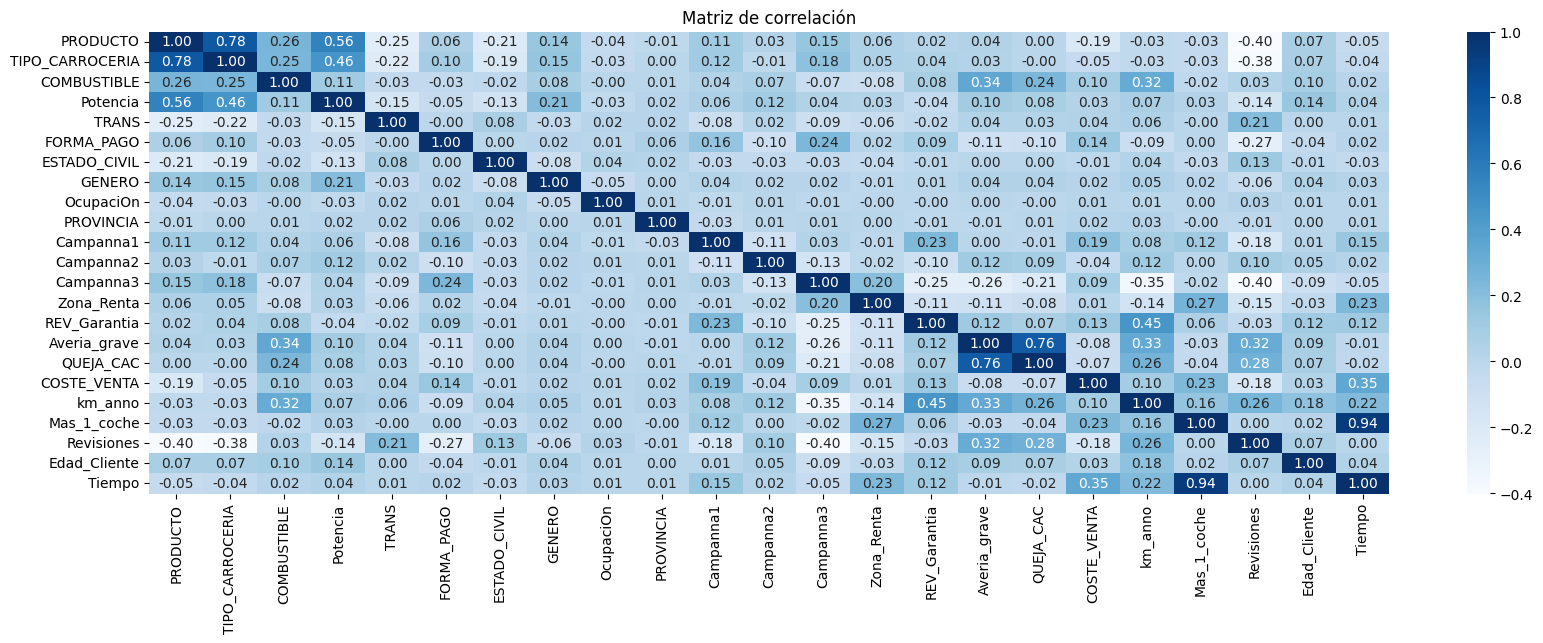

Para complementar este análisis, lo siguiente script genera gráficos de frecuencia para las variables categóricas con **más de dos valores únicos**, lo que permite detectar patrones y evaluar la necesidad de agrupación.

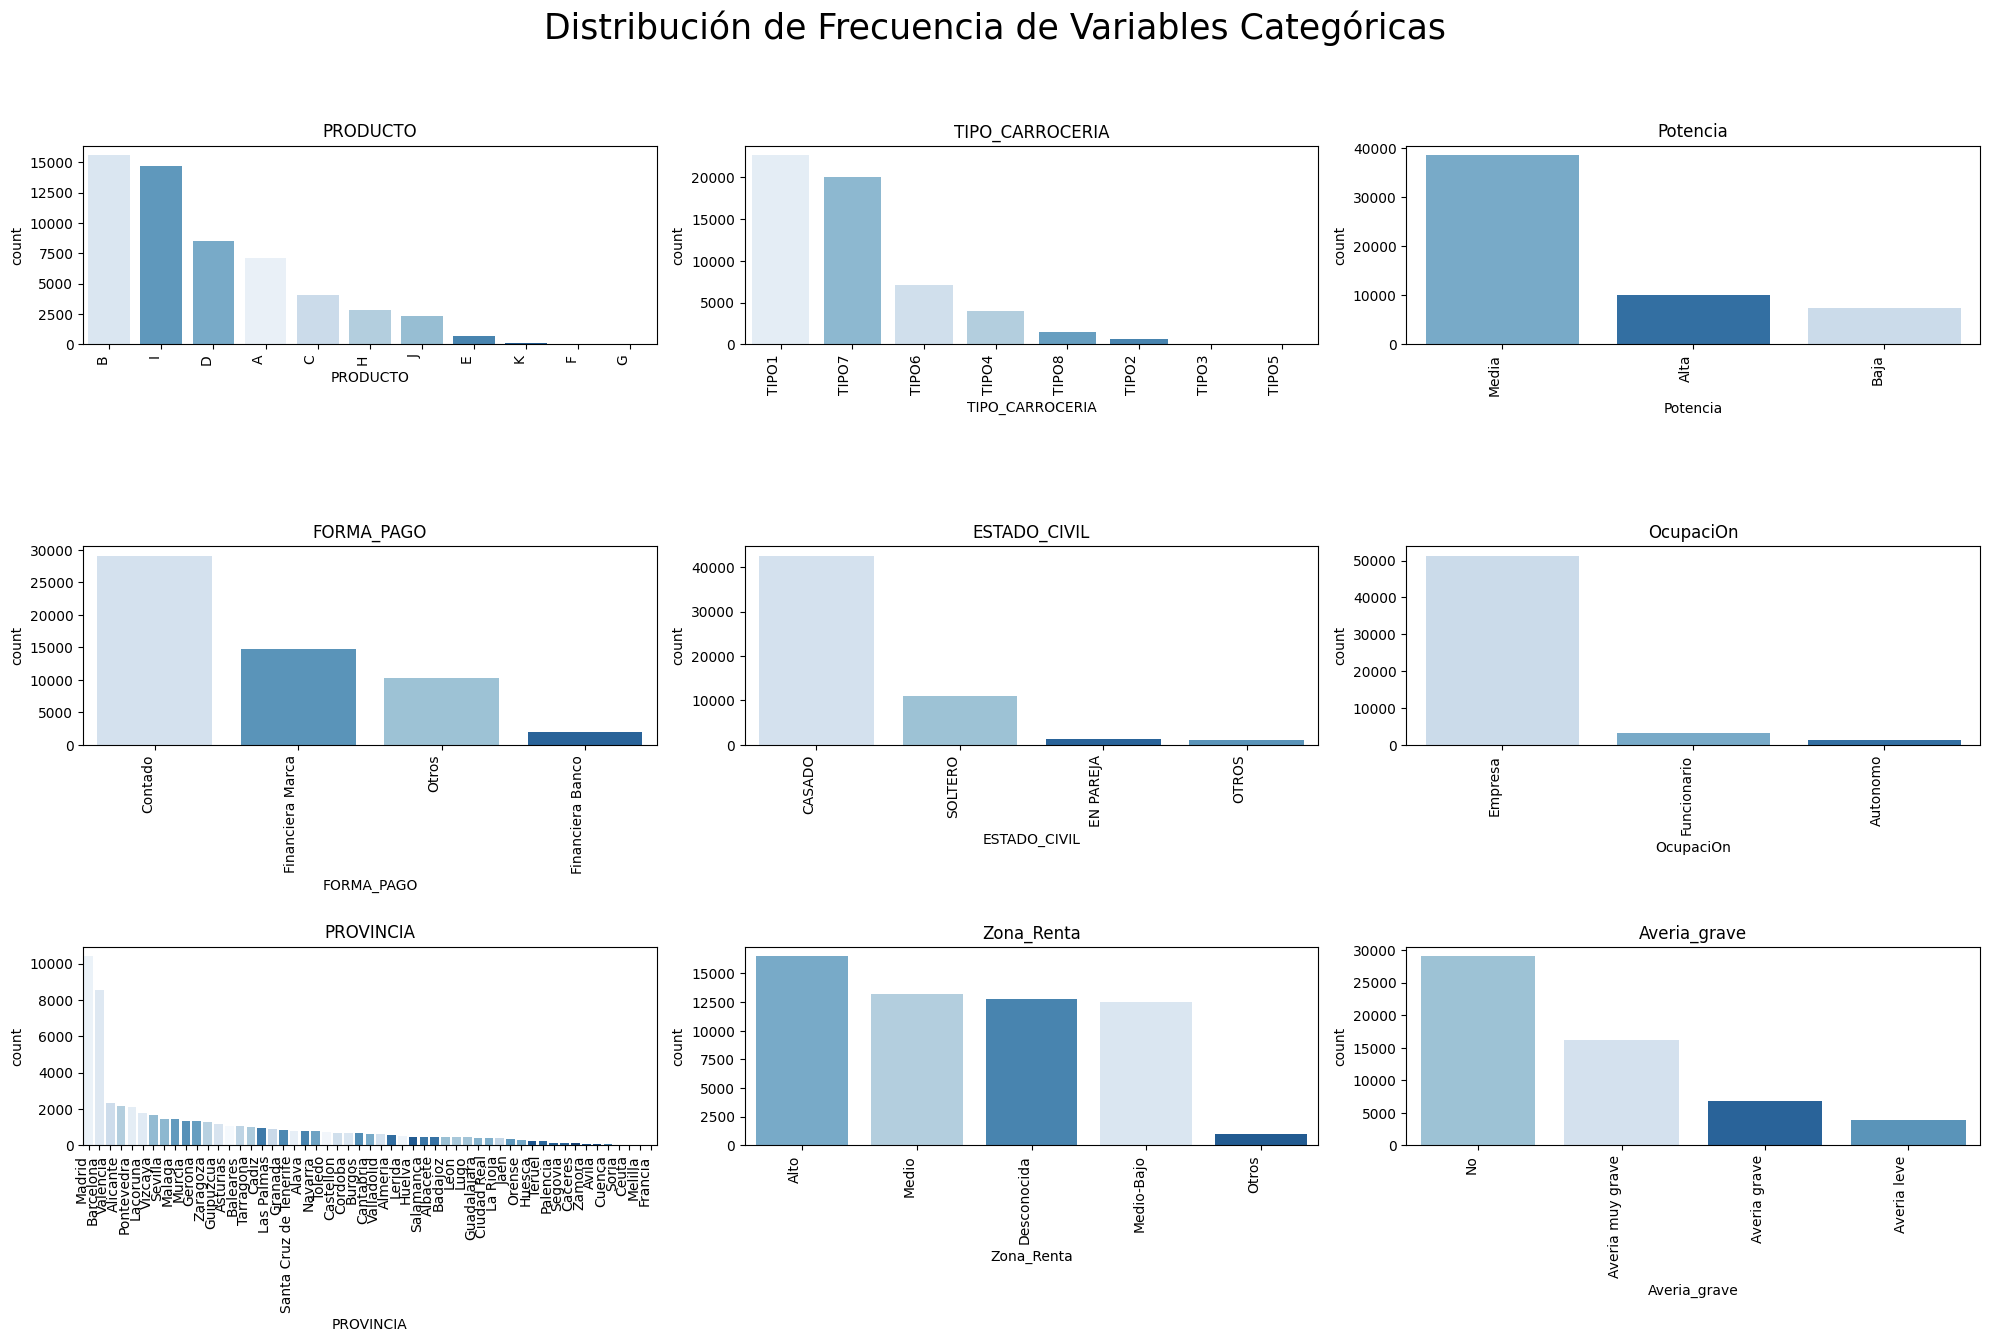

In [897]:
# Tamaño de la figura y la cantidad de filas/columnas.
num_vars = len(v_categoricas)
rows = (num_vars // 3) + (num_vars % 3 > 0)
fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(20, rows * 4))  # Ajuste automático.
fig.suptitle("Distribución de Frecuencia de Variables Categóricas", fontsize=25)
axes = axes.flatten()

# Graficación de cada categoría.
for i, col in enumerate([col for col in v_categoricas if df[col].nunique() > 2]):
    sns.countplot(data=df, x=col, ax=axes[i], hue=col, legend=False, order=df[col].value_counts().index, palette="Blues")
    axes[i].set_title(col)
    axes[i].set_xticks(range(len(df[col].value_counts().index)))
    axes[i].set_xticklabels(df[col].value_counts().index, rotation=90, ha="right")

# Ocultar ejes vacíos si hay menos variables que espacios en el grid.
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

##### **Provincias.**
La variable **PROVINCIA** tiene muchas categorías (52 provincias en España), lo que puede generar problemas en el modelo, especialmente si algunas provincias tienen muy pocas observaciones. Agrupar las provincias por Comunidad Autónoma es una estrategia útil para simplificar la variable y mejorar el rendimiento del modelo. A continuación, se detallan los motivos principales para realizar esta agrupación:
- **Reducción de la Dimensionalidad:** Tener 52 categorías en la variable aumenta la dimensionalidad del dataset, lo que puede afectar negativamente al rendimiento del modelo, especialmente si el número de observaciones por provincia es bajo. Agrupar las provincias por Comunidad Autónoma reduce el número de categorías a 17 (las comunidades autónomas de España), lo que simplifica el modelo y reduce el riesgo de sobreajuste.
- **Mejora del Rendimiento del Modelo:** Algunas provincias tienen muy pocas observaciones (por ejemplo, Cáceres, Zamora o Ceuta), lo que puede hacer que el modelo no generalice bien para esas categorías. Al agrupar las provincias en comunidades autónomas, se aumenta el número de observaciones por categoría, lo que ayuda al modelo a aprender patrones más robustos y generalizables.
- **Contexto Geográfico y Cultural:** Las provincias dentro de una misma comunidad autónoma suelen compartir características geográficas, económicas y culturales similares, lo que puede ser relevante para predecir el comportamiento del cliente. Agrupar por comunidad autónoma permite capturar estas similitudes y reducir el ruido que podría introducir la granularidad excesiva de las provincias.
- **Cumplimiento de Requisitos de Negocio:** Las campañas de marketing y las estrategias comerciales suelen planificarse a nivel de comunidad autónoma, no de provincia. Agrupar por comunidad autónoma alinea el modelo con las necesidades del negocio, facilitando la implementación de campañas dirigidas y la toma de decisiones estratégicas.


In [898]:
# Definir diccionario de clasificación por región geográfica
region_dict = {
    "Andalucia": ["Almeria", "Cadiz", "Cordoba", "Granada", "Huelva", "Jaen", "Malaga", "Sevilla"],
    "Aragon": ["Huesca", "Teruel", "Zaragoza"],
    "Asturias": ["Asturias"],
    "Baleares": ["Baleares"],
    "Canarias": ["Las Palmas", "Santa Cruz de Tenerife"],
    "Cantabria": ["Cantabria"],
    "Castilla y Leon": ["Avila", "Burgos", "Leon", "Palencia", "Salamanca", "Segovia", "Soria", "Valladolid", "Zamora"],
    "Castilla La Mancha": ["Albacete", "Ciudad Real", "Cuenca", "Guadalajara", "Toledo"],
    "Cataluña": ["Barcelona", "Gerona", "Lerida", "Tarragona"],
    "Extremadura": ["Badajoz", "Caceres"],
    "Galicia": ["Coruña", "Lugo", "Orense", "Pontevedra", "Lacoruna"],
    "Madrid": ["Madrid"],
    "Murcia": ["Murcia"],
    "Navarra": ["Navarra"],
    "Pais Vasco": ["Alava", "Guipuzcua", "Vizcaya"],
    "La Rioja": ["La Rioja"],
    "Valencia": ["Alicante", "Castellon", "Valencia"],
    "Ceuta y Melilla": ["Ceuta", "Melilla"]
}

# Función para asignar región a cada provincia
def clasificar_provincia(provincia):
    for region, provincias in region_dict.items():
        if provincia in provincias:
            return region
    return None  # Para manejar valores fuera de lista

# Aplicar la clasificación
df["COMUNIDAD_AUT"] = df["PROVINCIA"].apply(clasificar_provincia)
df[df['COMUNIDAD_AUT'].isnull()]['PROVINCIA'].unique()

array(['Francia'], dtype=object)

In [899]:
df = df[df['PROVINCIA'] != 'Francia'] # Estudio únicamente en España.

In [900]:
df.drop(columns=["PROVINCIA"], inplace=True)

In [901]:
v_categoricas = [col for col in v_categoricas if col != "PROVINCIA" and df[col].dtype != "float64"]
v_categoricas.append("COMUNIDAD_AUT")

##### **Forma de pago.**
La variable **Forma de Pago** representa las diferentes opciones de pago que los clientes eligen al adquirir un vehículo. Las categorías incluyen pagos al contado, financiación a través de la marca, financiación a través de un banco y otras opciones. Dado que algunas de estas categorías tienen una frecuencia baja y la variable en general no muestra una correlación significativa con la variable objetivo, se plantea la posibilidad de agruparlas para simplificar el modelo.

La variable **Forma de Pago** tiene una **correlación muy baja** con la probabilidad de que un cliente compre más de un coche, lo que sugiere que no es un factor determinante en la predicción. Además, en términos de importancia dentro del modelo, esta variable ocupa una posición media-baja, lo que indica que su **impacto en las predicciones es limitado**. Desde el punto de vista del negocio, la distinción entre financiación de la marca y financiación de un banco **no parece ser relevante para el objetivo principal** del proyecto, que es predecir la propensión de compra.

Se decide **agrupar las categorías de financiación (Financiera Marca y Financiera Banco)** en una única categoría llamada **Financiado**. Esta agrupación simplifica el modelo sin perder información relevante, ya que el objetivo principal no es analizar el tipo de financiación, sino predecir la probabilidad de que un cliente compre más de un coche. Agrupar estas categorías mantiene la información sobre si el cliente optó por financiación, lo que podría ser útil en estrategias de marketing. Esta decisión está alineada con el objetivo del proyecto, que es optimizar la segmentación de clientes y mejorar la eficiencia de las campañas de marketing.

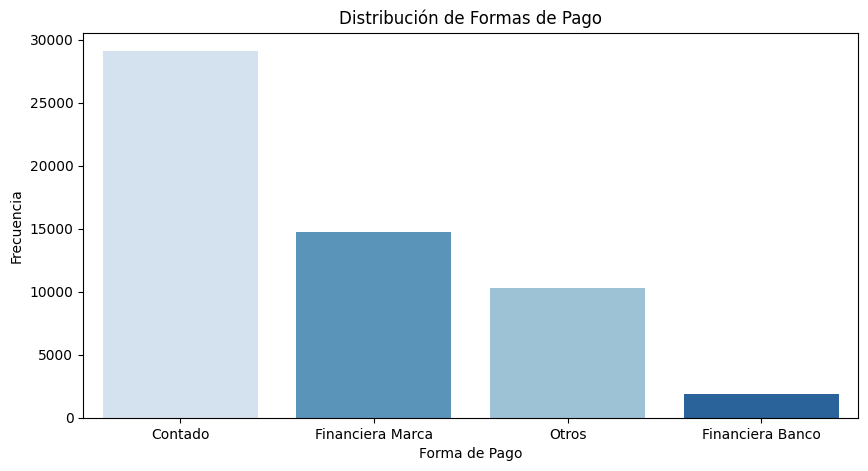

In [902]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='FORMA_PAGO', palette="Blues", order=df['FORMA_PAGO'].value_counts().index, hue='FORMA_PAGO')
plt.xlabel("Forma de Pago")
plt.ylabel("Frecuencia")
plt.title("Distribución de Formas de Pago")
plt.show()

In [903]:
df['FORMA_PAGO'] = df['FORMA_PAGO'].replace({
    'Financiera Marca': 'Financiado',
    'Financiera Banco': 'Financiado'
})

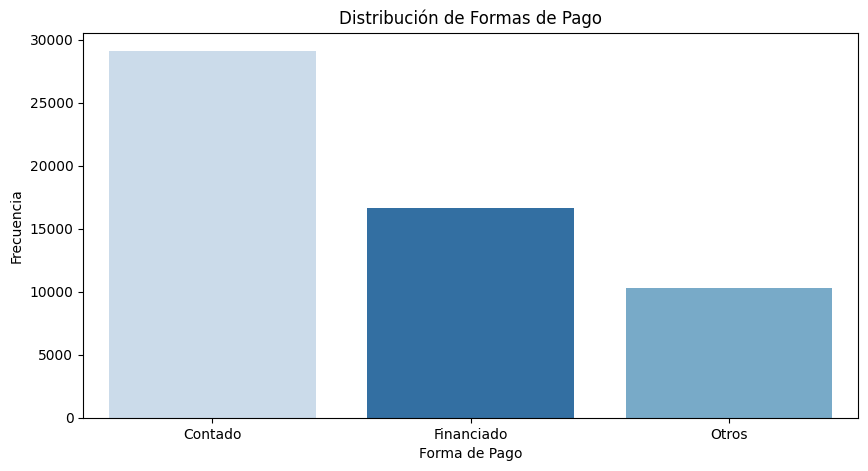

In [904]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='FORMA_PAGO', palette="Blues", order=df['FORMA_PAGO'].value_counts().index, hue='FORMA_PAGO')
plt.xlabel("Forma de Pago")
plt.ylabel("Frecuencia")
plt.title("Distribución de Formas de Pago")
plt.show()

#### **Variables con Orden Lógico (`OrdinalEncoder`).**
Las siguientes variables tienen un orden lógico en sus categorías, por lo que utilizaremos **OrdinalEncoder** para mantener la relación jerárquica entre ellas. Se asignan valores numéricos respetando el orden jerárquico de las categorías.

In [905]:
# Definición del orden lógico de las variables ordinales.
ordinal_cols = {
    "Potencia": ["Baja", "Media", "Alta"],
    "Zona_Renta": ["Desconocida", "Otros", "Medio-Bajo", "Medio", "Alto"],
    "Averia_grave": ["No", "Averia leve", "Averia grave", "Averia muy grave"]
}

In [906]:
ordinal_encoder = OrdinalEncoder(categories=[ordinal_cols[col] for col in ordinal_cols])
df[list(ordinal_cols.keys())] = ordinal_encoder.fit_transform(df[list(ordinal_cols.keys())])

#### **Variables sin Orden Específico (`LabelEncoder`).**
Las siguientes variables son categóricas nominales, es decir, no presentan una relación jerárquica entre sus categorías. Para estas, utilizaremos **LabelEncoder**, que asignará un valor numérico arbitrario a cada categoría.

In [907]:
# Variables categóricas a codificar (solo restan las nominales)
label_cols = [col for col in v_categoricas if df[col].dtype != "float64"]

for i in label_cols: # Codificación de las variables categóricas nominales
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i])

### **Tratamiento de variables continuas.**
El preprocesamiento de variables continuas es una etapa clave para mejorar la calidad del modelo y garantizar que las características numéricas aporten información relevante. En este apartado, hemos abordado distintas técnicas para optimizar estas variables y reducir posibles sesgos en el análisis.

In [908]:
df[v_continuas].head(3)

,COSTE_VENTA,km_anno,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,
CLI1,2892,0,2,18,0
CLI2,1376,7187,2,53,0
CLI3,1376,0,4,21,3


In [909]:
df[v_continuas].describe()

,COSTE_VENTA,km_anno,Revisiones,Edad_Cliente,Tiempo
count,56072.000000,56072.000000,56072.000000,56072.000000,56072.000000
mean,2468.680946,11461.212744,3.519118,47.335301,1.783189
std,1445.018067,9495.363399,2.524180,11.272031,3.022312
min,0.000000,0.000000,0.000000,18.000000,0.000000
25%,1595.000000,0.000000,1.000000,40.000000,0.000000
50%,2329.000000,11344.000000,3.000000,48.000000,0.000000
75%,3242.000000,17675.000000,5.000000,56.000000,4.000000
max,7063.000000,48428.000000,13.000000,71.000000,10.000000


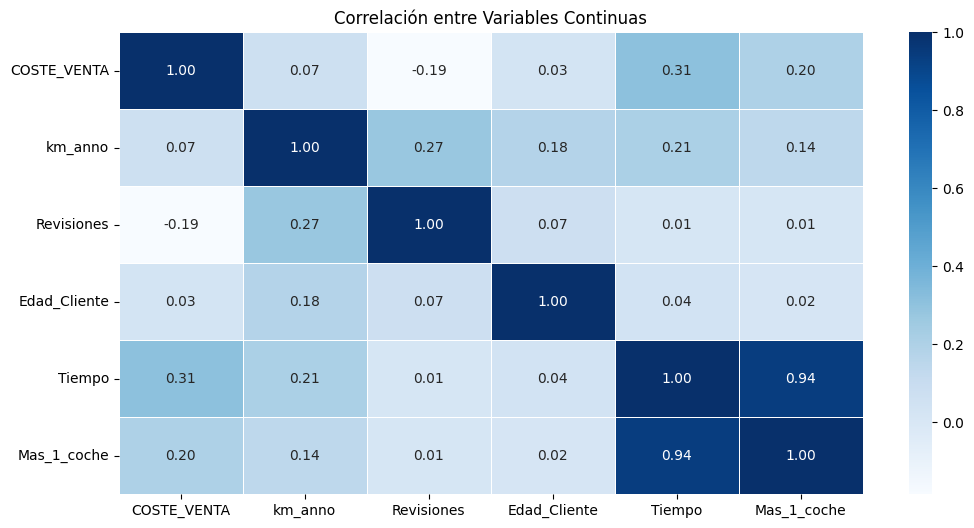

In [910]:
corr = df[v_continuas + ['Mas_1_coche']].corr()

plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Blues', linewidths=0.5)
plt.title("Correlación entre Variables Continuas")
plt.show()

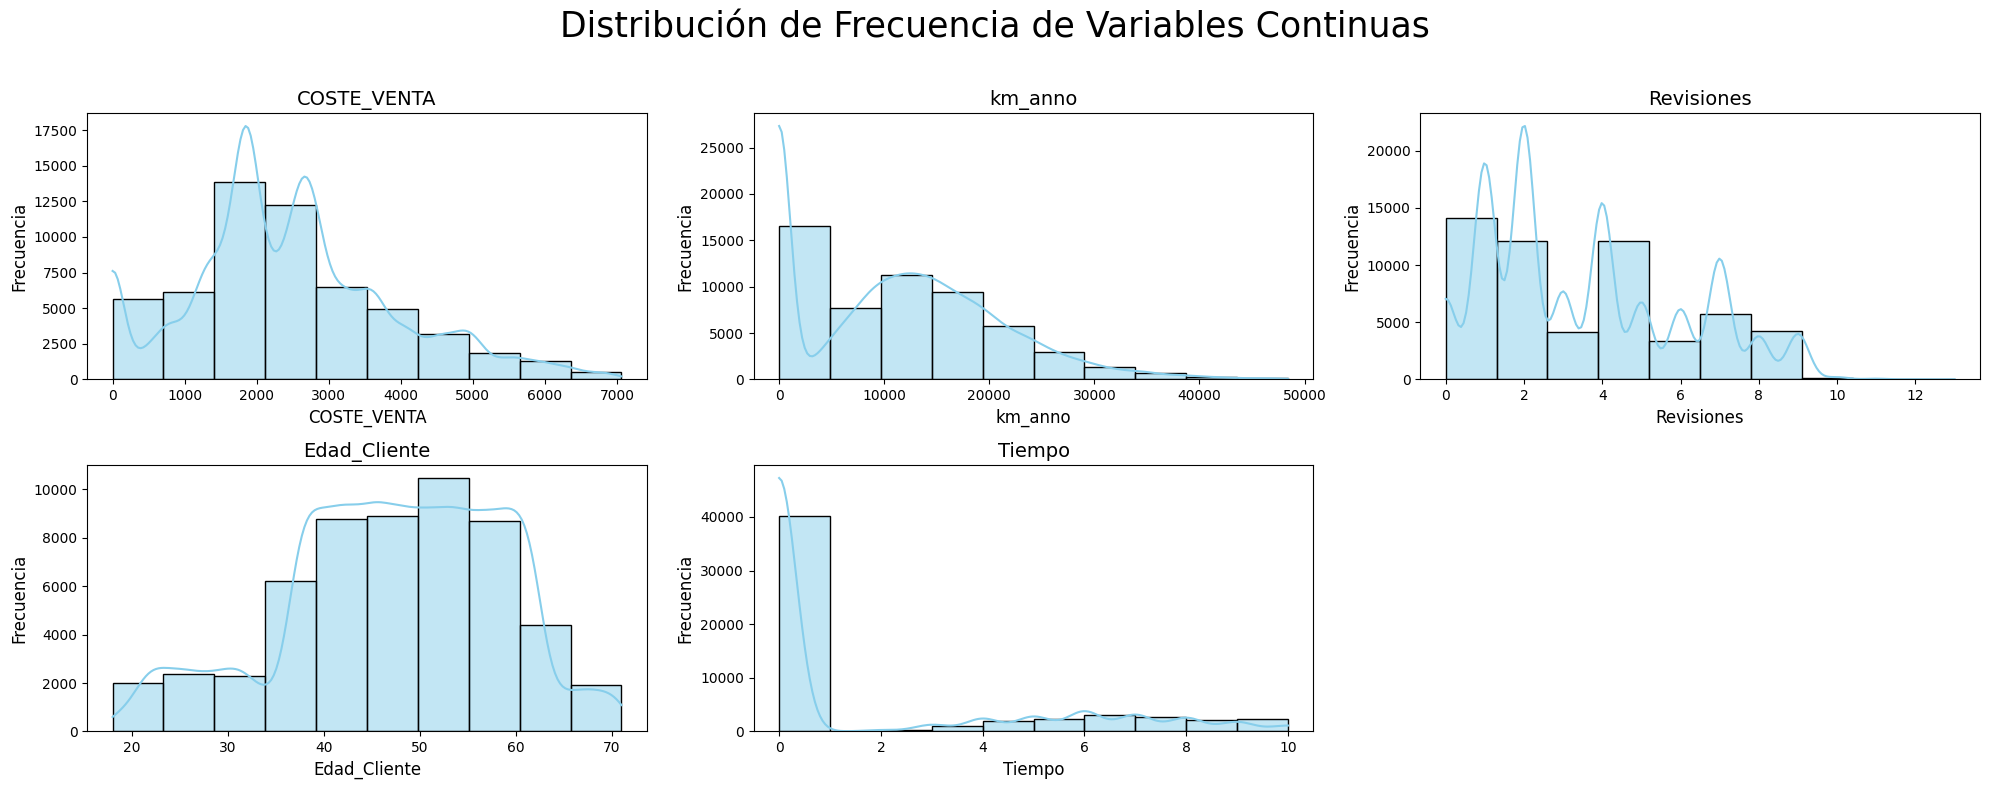

In [911]:
# Tamaño de la figura y la cantidad de filas/columnas.
num_vars = len(v_continuas)
rows = (num_vars // 3) + (num_vars % 3 > 0)
fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(20, rows * 4))  # Ajuste automático.
fig.suptitle("Distribución de Frecuencia de Variables Continuas", fontsize=25)
axes = axes.flatten()

# Graficación de cada categoría.
for i, col in enumerate(v_continuas):
    sns.histplot(data=df, x=col, ax=axes[i], kde=True, bins=10, color="skyblue")
    axes[i].set_title(col, fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frecuencia", fontsize=12)

# Ocultar ejes vacíos si hay menos variables que espacios en el grid.
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


#### **Agrupación de Edad del Cliente.**
La variable **Edad del Cliente** se ha dividido en tres segmentos: **18-30 años**, **31-50 años** y **51+ años**. Esta segmentación se justifica por las siguientes razones:

1. **Segmentación del Mercado:** La edad es un factor determinante en las decisiones de compra de vehículos. Cada grupo de edad tiene necesidades y comportamientos de compra distintos:
     - **18-30 años**: Clientes jóvenes que suelen adquirir su primer coche, con preferencias hacia vehículos económicos o deportivos.
     - **31-50 años**: Clientes en su etapa de mayor estabilidad económica, con mayor probabilidad de comprar vehículos familiares o de gama media.
     - **51+ años**: Clientes con mayor experiencia en la compra de vehículos, que podrían buscar coches más cómodos o con características de seguridad avanzadas.

2. **Análisis de la Distribución:** Los datos muestran una concentración significativa de clientes en el rango de **40 a 55 años**, lo que sugiere que este grupo es clave para el negocio. La segmentación en tres grupos permite capturar mejor las diferencias en el comportamiento de compra entre los distintos rangos de edad.

3. **Optimización del Modelo Predictivo:** Aunque la correlación entre **Edad del Cliente** y la variable objetivo **Mas de 1 Coche** es baja, la conversión de esta variable en categórica mejora la interpretabilidad del modelo y permite identificar patrones específicos en cada grupo de edad.

#### **Agrupación de Revisiones.**
La variable **Revisiones**, que representa el número de revisiones que ha tenido un vehículo, se ha categorizado en cuatro grupos: **0 revisiones**, **1-2 revisiones**, **3-4 revisiones** y **5+ revisiones**. Esta agrupación se justifica por las siguientes razones:

1. **Patrones de Mantenimiento del Vehículo:** El número de revisiones está relacionado con el uso y la antigüedad del vehículo. Los grupos definidos reflejan tendencias claras en el mantenimiento del coche:
     - **0 revisiones**: Vehículos nuevos o sin historial de mantenimiento registrado.
     - **1-2 revisiones**: Vehículos con uso moderado, que podrían estar en su primer ciclo de vida.
     - **3-4 revisiones**: Vehículos en mantenimiento regular, con posibilidad de renovación en el mediano plazo.
     - **5+ revisiones**: Vehículos con mayor antigüedad y alta probabilidad de cambio en el corto plazo.

2. **Análisis de la Distribución:** La mayoría de los vehículos tienen entre **0 y 4 revisiones**, lo que indica que estos grupos capturan la mayor parte de la variabilidad en los datos. Los vehículos con **5 o más revisiones** son menos frecuentes, pero representan un segmento importante para la estrategia de recompra.

3. **Impacto en la Propensión de Compra:** Aunque la correlación entre **Revisiones** y **Mas de 1 Coche** es baja, la conversión a variable categórica permite capturar patrones relevantes que podrían no ser evidentes en una variable continua.

4. **Aplicación en Estrategias Comerciales:** Esta agrupación permite identificar clientes con alta probabilidad de renovación de vehículo según su historial de mantenimiento. Por ejemplo, los clientes con **5+ revisiones** podrían ser un objetivo prioritario para campañas de recompra, ya que es probable que estén considerando cambiar su vehículo.

#### **Tratamiento del resto de variables.**
- La variable **Tiempo**, que representa los años entre compras, no se ha agrupado debido a su alta correlación con la variable objetivo. Esta variable es fundamental para el modelo, ya que captura directamente el comportamiento de recompra de los clientes. Agruparla podría reducir su capacidad predictiva y generar dependencia excesiva en esta columna, lo que no es deseable para un modelo robusto.
- **Coste de Venta** tiene una correlación moderada con la variable objetivo y su distribución no presenta patrones claros que justifiquen una agrupación.
- **KM Año** también tiene una correlación moderada y su distribución es más uniforme, por lo que mantenerla como variable continua permite al modelo capturar mejor su relación con la propensión de compra.

In [912]:
df['Edad_Cliente'] = pd.cut(df['Edad_Cliente'], bins=[17, 30, 50, 71], labels=['18-30', '31-50', '51+'])
df['Revisiones'] = pd.cut(df['Revisiones'], bins=[-1, 0, 2, 4, 13], labels=['0', '1-2', '3-4', '5+'])

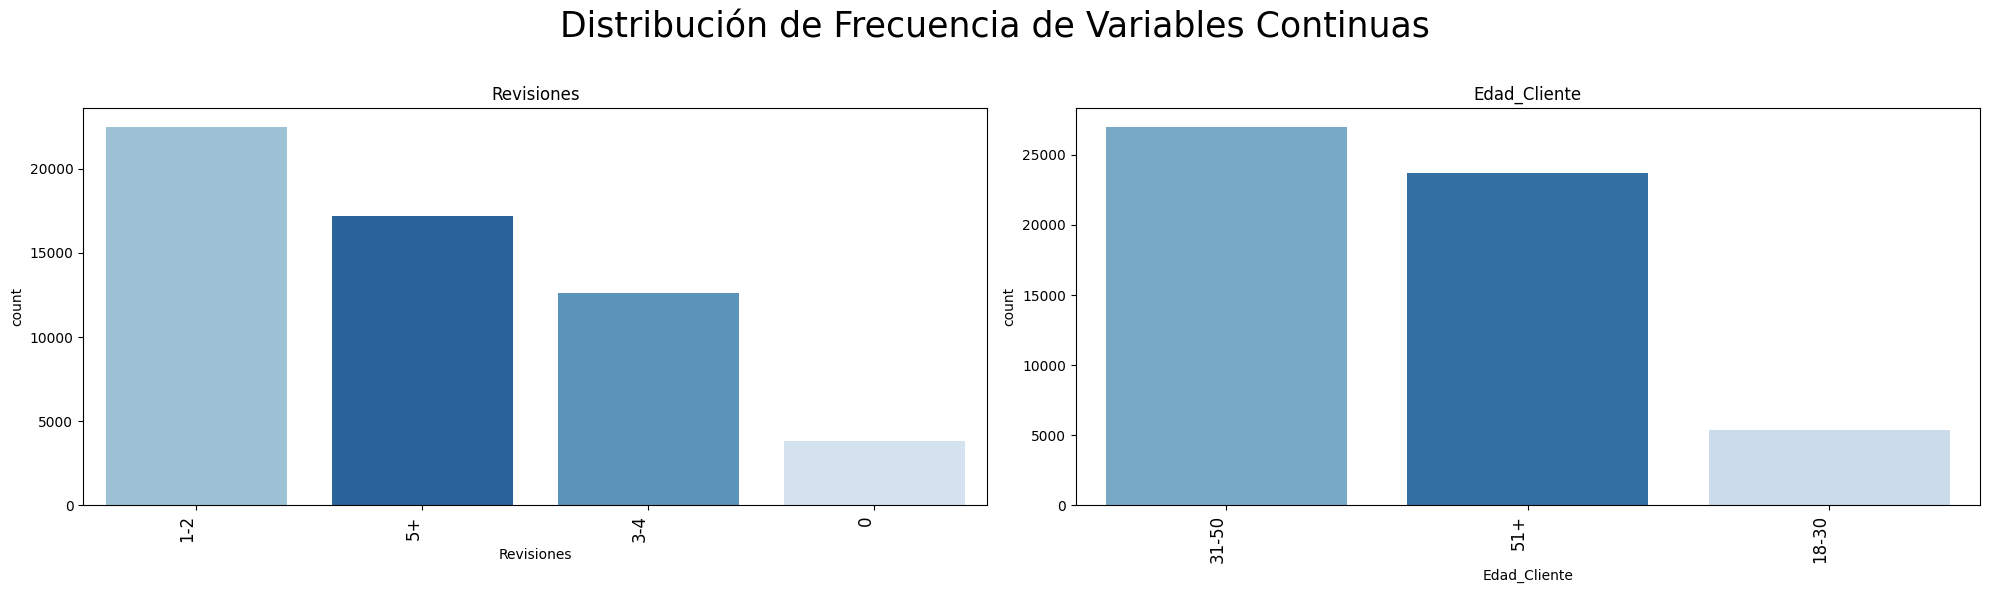

In [913]:
# Tamaño de la figura y la cantidad de filas/columnas.
num_vars = 2
rows = (num_vars // 3) + (num_vars % 3 > 0)
fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(20, 6))  # Ajuste automático.
fig.suptitle("Distribución de Frecuencia de Variables Continuas", fontsize=25)
axes = axes.flatten()

# Graficación de cada categoría.
for i, col in enumerate(['Revisiones', 'Edad_Cliente']):
    sns.countplot(data=df, x=col, ax=axes[i], hue=col, legend=False, order=df[col].value_counts().index, palette="Blues")
    axes[i].set_title(col, fontsize=12)
    axes[i].set_xticks(range(len(df[col].value_counts().index)))
    axes[i].set_xticklabels(df[col].value_counts().index, rotation=90, ha="right", fontsize=12)

# Ocultar ejes vacíos si hay menos variables que espacios en el grid.
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [914]:
for i in ['Revisiones', 'Edad_Cliente']: # Codificación de las variables categóricas nominales.
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i])

El tratamiento de variables continuas se abordó previamente en la fase de **Recopilación de datos**, donde se identificaron y gestionaron valores atípicos mediante el **método del rango intercuartil (IQR)**. En este proceso, se detectaron y eliminaron registros extremos que podrían distorsionar el modelo, garantizando así una mejor calidad en los datos sin afectar su distribución general.

## **Exportación del Dataset Final.**
Tras completar el preprocesamiento de los datos, es necesario guardar el dataset limpio y transformado para su uso en el modelo de clasificación. En esta etapa, aseguramos que todas las variables estén correctamente codificadas, sin valores nulos ni atípicos, y listas para ser utilizadas en el entrenamiento del modelo. Exportaremos el dataset en **formato CSV** para facilitar su integración con los algoritmos de clasificación, asegurando que los datos sean accesibles de manera eficiente en futuras etapas del análisis.

In [915]:
df.to_csv('../data/processed/IA_PROPENSITY_TRAIN_v2.csv', index=True)